In [ ]:
pip install opencv-contrib-python

In [ ]:
pip install tensorflow

In [ ]:
pip install --upgrade pip

In [ ]:
!pip install imutils

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, Adagrad
from keras import backend as K
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
train_images = sorted(os.listdir(r"C:\Users\User\Desktop\Test Data set"))
train_image = []



In [3]:
for im in train_images:
    img = image.load_img(r"C:\Users\User\Desktop\Test Data set\\"+ im, target_size=(64,64), color_mode= 'grayscale')
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
train_df = np.array(train_image)
print(train_df.shape)

(300, 64, 64, 1)


In [4]:
def show_img(dataset):
    f, ax = plt.subplots(1,5)
    f.set_size_inches(40, 20)
    for i in range(5,10):
        ax[i-5].imshow(dataset[i].reshape(64,64), cmap='gray')
    plt.show()

In [5]:
def add_noise(image):
    row,col,ch= image.shape
    mean = 0
    sigma = 1
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss*0.03
    return noisy

In [6]:
noise_imgs= []

for img in train_df:
    noisy_img = add_noise(img)
    noise_imgs.append(noisy_img)

noise_imgs= np.array(noise_imgs)

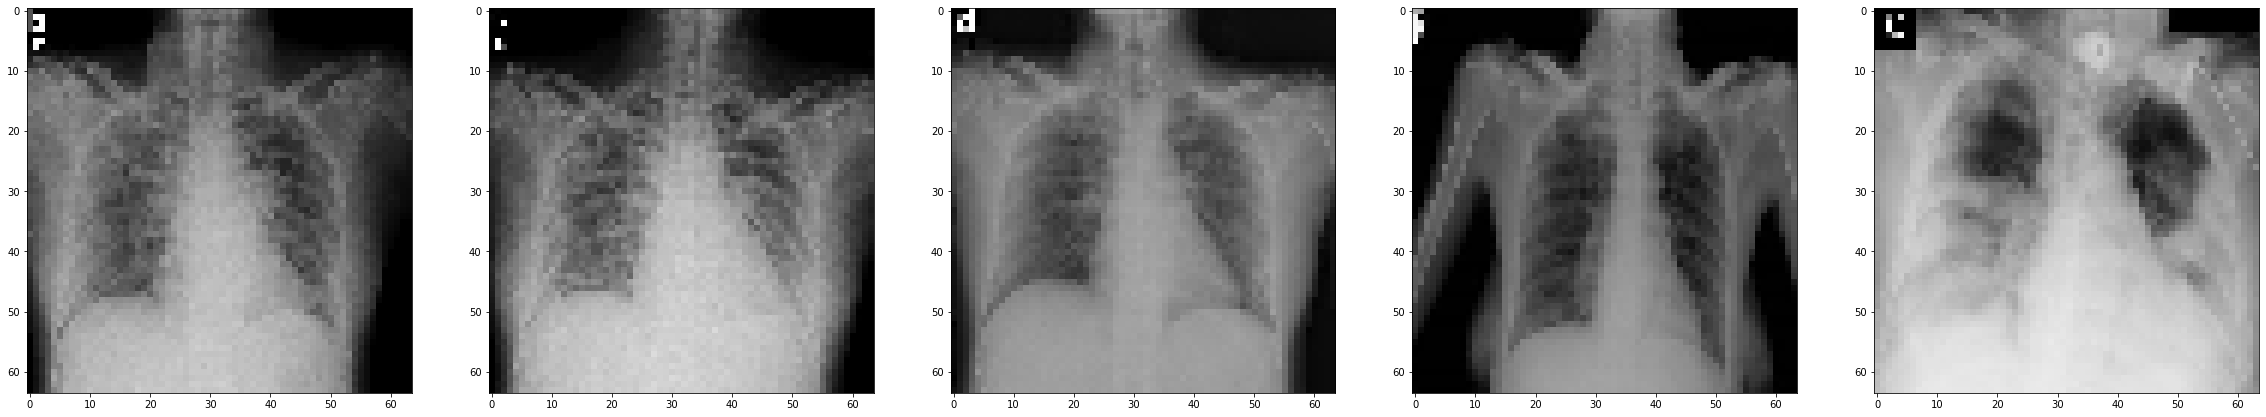

In [7]:
show_img(train_df)

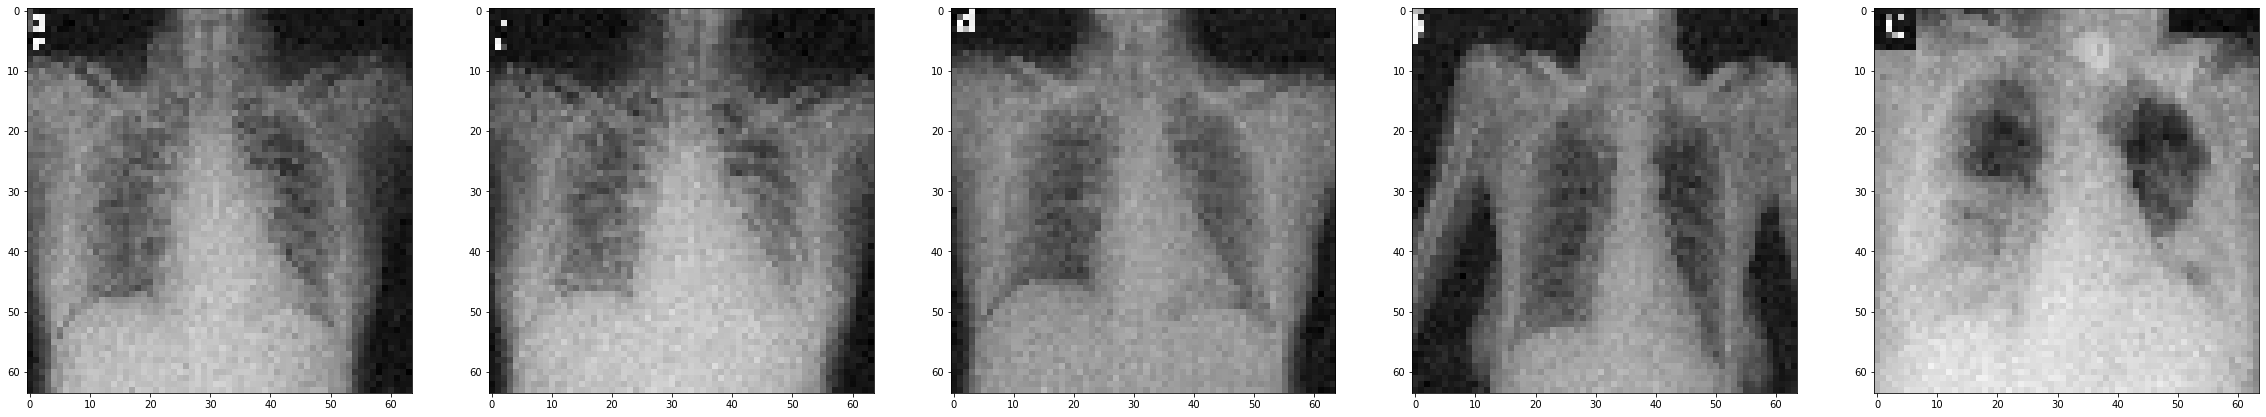

In [8]:
show_img(noise_imgs)

In [9]:
print('Noisy image shape: ',noise_imgs.shape,' Train image shape: ',train_df.shape)

Noisy image shape:  (300, 64, 64, 1)  Train image shape:  (300, 64, 64, 1)


In [10]:
xnoised= noise_imgs[0:240]
xtest= noise_imgs[240:]

In [11]:
def autoencoder():
    
    input_img = Input(shape=(64,64,1), name='image_input')
    
    #enoder 
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
    x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
    
    #decoder
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
    x = UpSampling2D((2,2), name='upsample1')(x)
    x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv4')(x)
    x = UpSampling2D((2,2), name='upsample2')(x)
    x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
    
    #model
    autoencoder = Model(inputs=input_img, outputs=x)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    return autoencoder

In [12]:
    model= autoencoder()
    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 64, 64, 1)]       0         
                                                                 
 Conv1 (Conv2D)              (None, 64, 64, 64)        640       
                                                                 
 pool1 (MaxPooling2D)        (None, 32, 32, 64)        0         
                                                                 
 Conv2 (Conv2D)              (None, 32, 32, 64)        36928     
                                                                 
 pool2 (MaxPooling2D)        (None, 16, 16, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None, 16, 16, 64)        36928     
                                                                 
 upsample1 (UpSampling2D)    (None, 32, 32, 64)        0     

In [16]:
with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    model.fit(xnoised, xnoised, epochs=70, batch_size=10, validation_data=(xtest, xtest), callbacks=[early_stopping])

Epoch 1/70
24/24 [==============================] - 2s 81ms/step - loss: 0.6509 - val_loss: 0.6056
Epoch 2/70
24/24 [==============================] - 2s 74ms/step - loss: 0.6006 - val_loss: 0.5932
Epoch 3/70
24/24 [==============================] - 2s 74ms/step - loss: 0.5941 - val_loss: 0.5911
Epoch 4/70
24/24 [==============================] - 2s 76ms/step - loss: 0.5918 - val_loss: 0.5878
Epoch 5/70
24/24 [==============================] - 2s 75ms/step - loss: 0.5893 - val_loss: 0.5854
Epoch 6/70
24/24 [==============================] - 2s 74ms/step - loss: 0.5884 - val_loss: 0.5843
Epoch 7/70
24/24 [==============================] - 2s 74ms/step - loss: 0.5874 - val_loss: 0.5835
Epoch 8/70
24/24 [==============================] - 2s 79ms/step - loss: 0.5867 - val_loss: 0.5828
Epoch 9/70
24/24 [==============================] - 2s 80ms/step - loss: 0.5862 - val_loss: 0.5834
Epoch 10/70
24/24 [==============================] - 2s 75ms/step - loss: 0.5859 - val_loss: 0.5822
Epoch 11/

In [13]:
xtrain= train_df[240:]

In [17]:

print (xtest.shape)

(60, 64, 64, 1)


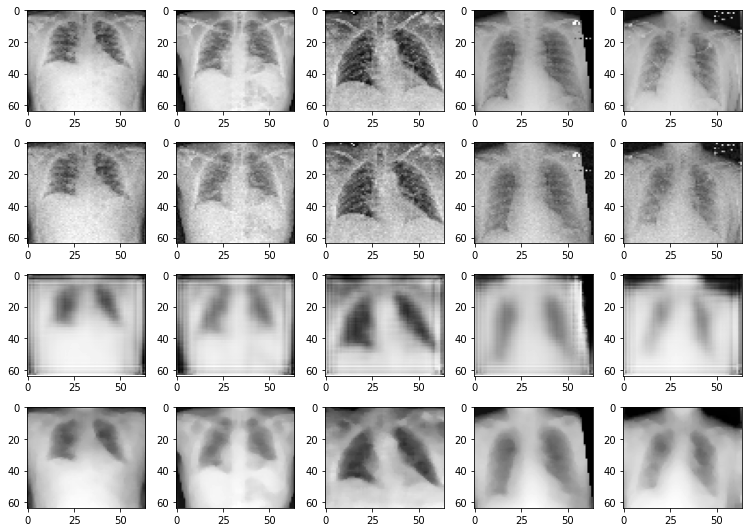

In [18]:
import cv2
import numpy
#num_test = 20
pred= model.predict(xtest[:5])

#for im in pred
#save_path = r'C:\Users\User\Desktop\COVID-19_Radiography_Dataset\Normal\pred [i].png'
#image_to_save = numpy.squeeze(numpy.array(pred[i] * 255), axis=2)
#print(image_to_save.shape)
#cv2.imwrite(save_path, image_to_save)

def plot_predictions(y_true, y_pred):    
    f, ax = plt.subplots(4, 5)
    f.set_size_inches(10.5,7.5)
    for i in range(5):
        ax[0][i].imshow(np.reshape(xtrain[i], (64,64)), aspect='auto', cmap='gray')
        ax[1][i].imshow(np.reshape(y_true[i], (64,64)), aspect='auto', cmap='gray')
        ax[2][i].imshow(np.reshape(y_pred[i], (64,64)), aspect='auto', cmap='gray')
        ax[3][i].imshow(cv2.medianBlur(xtrain[i], (5)), aspect='auto', cmap='gray')
       
    plt.tight_layout()

plot_predictions(xtest[:5], pred[:5])


In [14]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[0].png'
image_to_save = numpy.squeeze(numpy.array(xtest[0] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


NameError: name 'xtest' is not defined

In [15]:
import numpy
import cv2
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[1].png'
image_to_save = numpy.squeeze(numpy.array(xtest[1] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


NameError: name 'xtest' is not defined

In [16]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[2].png'
image_to_save = numpy.squeeze(numpy.array(xtest[2] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)

NameError: name 'xtest' is not defined

In [26]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[3].png'
image_to_save = numpy.squeeze(numpy.array(xtest[3] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)

(64, 64)


True

In [27]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[4].png'
image_to_save = numpy.squeeze(numpy.array(xtest[4] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)

(64, 64)


True

In [28]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[5].png'
image_to_save = numpy.squeeze(numpy.array(xtest[5] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)

(64, 64)


True

In [35]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[6].png'
image_to_save = numpy.squeeze(numpy.array(xtest[6] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [36]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[7].png'
image_to_save = numpy.squeeze(numpy.array(xtest[7] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [37]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[8].png'
image_to_save = numpy.squeeze(numpy.array(xtest[8] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [38]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[9].png'
image_to_save = numpy.squeeze(numpy.array(xtest[9] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [39]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[10].png'
image_to_save = numpy.squeeze(numpy.array(xtest[10] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [40]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[11].png'
image_to_save = numpy.squeeze(numpy.array(xtest[11] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [41]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[12].png'
image_to_save = numpy.squeeze(numpy.array(xtest[12] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [42]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[13].png'
image_to_save = numpy.squeeze(numpy.array(xtest[13] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [43]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[14].png'
image_to_save = numpy.squeeze(numpy.array(xtest[14] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [44]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[15].png'
image_to_save = numpy.squeeze(numpy.array(xtest[15] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [45]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[16].png'
image_to_save = numpy.squeeze(numpy.array(xtest[16] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [46]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[17].png'
image_to_save = numpy.squeeze(numpy.array(xtest[17] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [47]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[18].png'
image_to_save = numpy.squeeze(numpy.array(xtest[18] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [48]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[19].png'
image_to_save = numpy.squeeze(numpy.array(xtest[19] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [49]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[20].png'
image_to_save = numpy.squeeze(numpy.array(xtest[20] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [53]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[21].png'
image_to_save = numpy.squeeze(numpy.array(xtest[21] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [54]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[22].png'
image_to_save = numpy.squeeze(numpy.array(xtest[22] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [55]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[23].png'
image_to_save = numpy.squeeze(numpy.array(xtest[23] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [56]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[24].png'
image_to_save = numpy.squeeze(numpy.array(xtest[24] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [57]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[25].png'
image_to_save = numpy.squeeze(numpy.array(xtest[25] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [58]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[26].png'
image_to_save = numpy.squeeze(numpy.array(xtest[26] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [59]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[27].png'
image_to_save = numpy.squeeze(numpy.array(xtest[27] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [60]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[28].png'
image_to_save = numpy.squeeze(numpy.array(xtest[28] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [61]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[29].png'
image_to_save = numpy.squeeze(numpy.array(xtest[29] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [62]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[30].png'
image_to_save = numpy.squeeze(numpy.array(xtest[30] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [63]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[31].png'
image_to_save = numpy.squeeze(numpy.array(xtest[31] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [64]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[32].png'
image_to_save = numpy.squeeze(numpy.array(xtest[32] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [65]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[33].png'
image_to_save = numpy.squeeze(numpy.array(xtest[33] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [66]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[34].png'
image_to_save = numpy.squeeze(numpy.array(xtest[34] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [67]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[35].png'
image_to_save = numpy.squeeze(numpy.array(xtest[35] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [68]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[36].png'
image_to_save = numpy.squeeze(numpy.array(xtest[36] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [69]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[37].png'
image_to_save = numpy.squeeze(numpy.array(xtest[37] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [70]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[38].png'
image_to_save = numpy.squeeze(numpy.array(xtest[38] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [71]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[39].png'
image_to_save = numpy.squeeze(numpy.array(xtest[39] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [72]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[40].png'
image_to_save = numpy.squeeze(numpy.array(xtest[40] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [73]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[41].png'
image_to_save = numpy.squeeze(numpy.array(xtest[41] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [74]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[42].png'
image_to_save = numpy.squeeze(numpy.array(xtest[42] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [75]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[43].png'
image_to_save = numpy.squeeze(numpy.array(xtest[43] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [76]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[44].png'
image_to_save = numpy.squeeze(numpy.array(xtest[44] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [77]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[45].png'
image_to_save = numpy.squeeze(numpy.array(xtest[45] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [78]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[46].png'
image_to_save = numpy.squeeze(numpy.array(xtest[46] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [79]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[47].png'
image_to_save = numpy.squeeze(numpy.array(xtest[47] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [80]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[48].png'
image_to_save = numpy.squeeze(numpy.array(xtest[48] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [81]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[49].png'
image_to_save = numpy.squeeze(numpy.array(xtest[49] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [82]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[50].png'
image_to_save = numpy.squeeze(numpy.array(xtest[50] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [83]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[51].png'
image_to_save = numpy.squeeze(numpy.array(xtest[51] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [84]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[52].png'
image_to_save = numpy.squeeze(numpy.array(xtest[52] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [85]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[53].png'
image_to_save = numpy.squeeze(numpy.array(xtest[53] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [86]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[54].png'
image_to_save = numpy.squeeze(numpy.array(xtest[54] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [87]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[55].png'
image_to_save = numpy.squeeze(numpy.array(xtest[55] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [88]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[56].png'
image_to_save = numpy.squeeze(numpy.array(xtest[56] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [89]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[57].png'
image_to_save = numpy.squeeze(numpy.array(xtest[57] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [90]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[58].png'
image_to_save = numpy.squeeze(numpy.array(xtest[58] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True

In [91]:
save_path = r'C:\Users\User\Desktop\Test Data set\Filter\xtest[59].png'
image_to_save = numpy.squeeze(numpy.array(xtest[59] * 255), axis=2)
print(image_to_save.shape)
cv2.imwrite(save_path, image_to_save)


(64, 64)


True